# Power Circuit Theory, Lab 1, Spring 2018
## Author: Alexander Hiller (11850637)



## Part 1: Single Phase RC Circuit

### RC Circuit: Data Aggregation

In [2]:
import pandas as pd
from math import atan, pi, cos, sin
import matplotlib.pyplot as plt

df_rc = pd.DataFrame({
    '|$V_r$|':  [0,     10,    20,    30,    40,    50,    60,    70,    80,    90,    100,   110], 
    '|$V_c$|':  [120.9, 120.1, 119.1, 116.6, 114.4, 110.5, 107.7, 102.3, 95.1,  86.8,  73.8,  59.5], 
    '|$I_p$|':  [0.764, 0.748, 0.732, 0.716, 0.698, 0.684, 0.664, 0.628, 0.580, 0.534, 0.458, 0.360], 
    })

# Calculate resistance
df_rc["$R$"] = df_rc['|$V_r$|']/df_rc['|$I_p$|']

# Calculate phase angle of V_r
phi = []
for i, el in enumerate(df_rc["$R$"]):
    const = pi*(10**6)/(180*50*20)
    if (df_rc["$R$"][i] != 0):
        arg = const*1/(df_rc["$R$"][i])
        phi.append(atan(arg))
    else:
        phi.append(pi/2)

df_rc["$\phi_r$ (radians)"] = phi
        
# Convert back to degrees
for i, el in enumerate(phi):
    phi[i] = el*180/pi

df_rc["$\phi_r$ (degrees)"] =  phi

# Calculate V_c's phase angle in radians
from math import pi
phi_c = []
for i, el in enumerate(df_rc["$\phi_r$ (radians)"]):
    phi_c.append(df_rc["$\phi_r$ (radians)"][i] - pi/2)

df_rc["$\phi_c$ (radians)"] = phi_c

# Calculate V_c's phase angle in degrees
phi_c = []
for i, el in enumerate(df_rc["$\phi_r$ (degrees)"]):
    phi_c.append(df_rc["$\phi_r$ (degrees)"][i] - 90)

df_rc["$\phi_c$ (degrees)"] = phi_c


# Round values to three decimal places
df_rc = df_rc.round(3)

df_rc


,|$V_r$|,|$V_c$|,|$I_p$|,$R$,$\phi_r$ (radians),$\phi_r$ (degrees),$\phi_c$ (radians),$\phi_c$ (degrees)
0,0,120.9,0.764,0.000,1.571,90.000,0.000,0.000
1,10,120.1,0.748,13.369,0.917,52.548,-0.654,-37.452
2,20,119.1,0.732,27.322,0.568,32.570,-1.002,-57.430
3,30,116.6,0.716,41.899,0.395,22.614,-1.176,-67.386
4,40,114.4,0.698,57.307,0.296,16.939,-1.275,-73.061
5,50,110.5,0.684,73.099,0.234,13.429,-1.336,-76.571
6,60,107.7,0.664,90.361,0.191,10.932,-1.380,-79.068
7,70,102.3,0.628,111.465,0.155,8.899,-1.415,-81.101
8,80,95.1,0.580,137.931,0.126,7.212,-1.445,-82.788
9,90,86.8,0.534,168.539,0.103,5.912,-1.468,-84.088


### Loci of RC Circuit

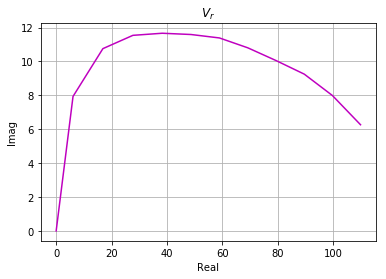

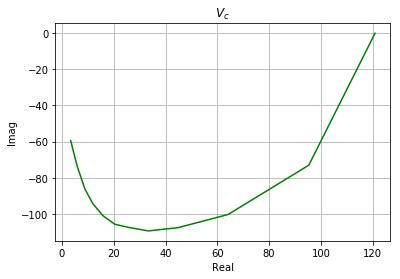

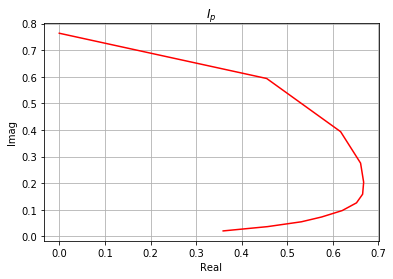

In [3]:
# Loci of V_r
v_r_real = []
v_r_imag = []
for i, el in enumerate(df_rc["|$V_r$|"]):
    v_r_real.append( df_rc["|$V_r$|"][i]*cos(df_rc["$\phi_r$ (radians)"][i]))
    v_r_imag.append( df_rc["|$V_r$|"][i]*sin(df_rc["$\phi_r$ (radians)"][i]))

# Loci of V_c
v_c_real = []
v_c_imag = []
for i, el in enumerate(df_rc["|$V_c$|"]):
    v_c_real.append( df_rc["|$V_c$|"][i]*cos(df_rc["$\phi_c$ (radians)"][i]))
    v_c_imag.append( df_rc["|$V_c$|"][i]*sin(df_rc["$\phi_c$ (radians)"][i]))

# Loci of I
i_real = []
i_imag = []
for i, el in enumerate(df_rc["|$I_p$|"]):
    i_real.append( df_rc["|$I_p$|"][i]*cos(df_rc["$\phi_r$ (radians)"][i]))
    i_imag.append( df_rc["|$I_p$|"][i]*sin(df_rc["$\phi_r$ (radians)"][i]))
    
plt.figure(1)
plt.plot(v_r_real, v_r_imag, color='m')
plt.grid()
plt.title("$V_r$")
# plt.axis([0, max(v_r_real), 0, max(v_r_real)])
plt.xlabel("Real")
plt.ylabel("Imag")
plt.savefig('RC_V_r_locus')
plt.show()

plt.figure(2)
plt.plot(v_c_real, v_c_imag, color='g')
plt.grid()
plt.title("$V_c$")
# plt.axis([0, max(v_r_real), 0, max(v_r_real)])
plt.xlabel("Real")
plt.ylabel("Imag")
plt.savefig('RC_V_c_locus')
plt.show()

plt.figure(3)
plt.plot(i_real, i_imag, color='r')
plt.grid()
plt.title("$I_p$")
# plt.axis([0, max(v_r_real), 0, max(v_r_real)])
plt.xlabel("Real")
plt.ylabel("Imag")
plt.savefig('RC_I_p_locus')
plt.show()

## Part 2: Single Phase RL Circuit

### RL Circuit: Data Aggregation

In [56]:
import pandas as pd
df_rl = pd.DataFrame({
        '$ |{V_r}| $':          [0.1,     10,    20,    30,    40,    50,    60,    70,    80   ], 
    '|$V_{p , \ rms}$|':    [120.9, 121.1, 121.1, 120.9, 120.9, 121.2, 121.3, 121.4, 121.4],
    '|$I_p$| (Wattmeter)':  [0.94,  0.90,  0.85,  0.78,  0.73,  0.66,  0.58,  0.54,  0.45 ],
    '|$I_p$| (Variac)':     [0.938, 0.892, 0.820, 0.766, 0.690, 0.618, 0.544, 0.460, 0.376],
    '|$V_L$|':              [121.1, 114.1, 106.1, 97.8,  88.8,  79.7,  69.9,  59.7,  49.1 ],
    'Measured $P $ (watts)': [77,    79,    77,    74,    70,    65,    58,    53,    46   ],
    'Measured $S$ (VA)':    [114,   111,   103,   95,    87,    81,    72,    65,    55   ],
    'Measured $Q$ (VAR)':   [84,    78,    70,    58,    54,    48,    40,    36,    33   ],
    'Measured $pf$':        [0.681, 0.709, 0.750, 0.781, 0.784, 0.810, 0.845, 0.841, 0.821],
    })

r_wm = []
for i, el in enumerate(df_rl["$ |{V_r}| $"]):
    r_wm.append(df_rl["$ |{V_r}| $"][i]/df_rl["|$I_p$| (Wattmeter)"][i])

r_varc = []
for i, el in enumerate(df_rl["$ |{V_r}| $"]):
    r_varc.append(df_rl["$ |{V_r}| $"][i]/df_rl["|$I_p$| (Variac)"][i])

    
df_rl["R (Wattmeter)"] = r_wm
df_rl["R (Variac)"] = r_varc

from math import acos, pow, fmod, pi
# Solves for angle C on euclidean obtuse triangle
def cosineRule(a, b, c):
    num = pow(a, 2)+pow(b,2)-pow(c,2)
    den = 2*a*b
    C = acos(fmod((num/den), 1))
    C = C*180.0/pi
    return C

# Calculate the angle of V_L
ang_v_l = []
for i, el in enumerate(df_rl["|$V_{p , \ rms}$|"]):
    ans = cosineRule(df_rl["|$V_{p , \ rms}$|"][i], df_rl["|$V_L$|"][i], df_rl["$ |{V_r}| $"][i])
    ang_v_l.append(ans)
    
df_rl["Angle of ${V_L}$"] = ang_v_l

# Calculate the angle of V_R
ang_v_r = []
for i, el in enumerate(df_rl["|$V_{p , \ rms}$|"]):
    ans = cosineRule(df_rl["|$V_{p , \ rms}$|"][i],  df_rl["$ |{V_r}| $"][i], df_rl["|$V_L$|"][i])
    ang_v_r.append(-ans)
    
df_rl["Angle of ${V_R}$"] = ang_v_r

# Round and show result
df_rl.round(3)

# Find L and RL


,$ |{V_r}| $,"|$V_{p , \ rms}$|",|$I_p$| (Wattmeter),|$I_p$| (Variac),|$V_L$|,Measured $P $ (watts),Measured $S$ (VA),Measured $Q$ (VAR),Measured $pf$,R (Wattmeter),R (Variac),Angle of ${V_L}$,Angle of ${V_R}$
0,0.1,120.9,0.94,0.938,121.1,77,114,84,0.681,0.106,0.107,90.000,-90.071
1,10.0,121.1,0.90,0.892,114.1,79,111,78,0.709,11.111,11.211,3.481,-43.858
2,20.0,121.1,0.85,0.820,106.1,77,103,70,0.750,23.529,24.390,6.691,-38.175
3,30.0,120.9,0.78,0.766,97.8,74,95,58,0.781,38.462,39.164,10.099,-34.864
4,40.0,120.9,0.73,0.690,88.8,70,87,54,0.784,54.795,57.971,13.227,-30.527
5,50.0,121.2,0.66,0.618,79.7,65,81,48,0.810,75.758,80.906,16.313,-26.598
6,60.0,121.3,0.58,0.544,69.9,58,72,40,0.845,103.448,110.294,19.351,-22.708
7,70.0,121.4,0.54,0.460,59.7,53,65,36,0.841,129.630,152.174,22.394,-18.960
8,80.0,121.4,0.45,0.376,49.1,46,55,33,0.821,177.778,212.766,25.627,-15.394


## Loci of RL Circuit

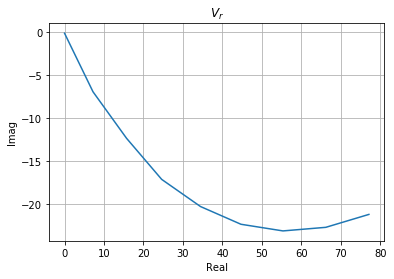

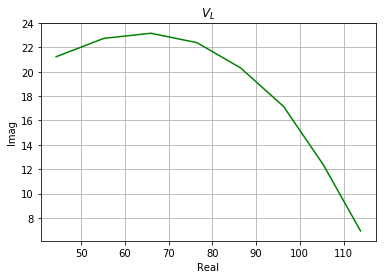

In [119]:
# Loci of V_r
v_r_real = []
v_r_imag = []
for i, el in enumerate(df_rl["$ |{V_r}| $"]):
    v_r_real.append( df_rl["$ |{V_r}| $"][i]*cos(df_rl["Angle of ${V_R}$"][i]*pi/180.0))
    v_r_imag.append( df_rl["$ |{V_r}| $"][i]*sin(df_rl["Angle of ${V_R}$"][i]*pi/180.0))

# Loci of V_L
v_l_real = []
v_l_imag = []
for i, el in enumerate(df_rl["|$V_L$|"]):
    v_l_real.append( df_rl["|$V_L$|"][i]*cos(df_rl["Angle of ${V_L}$"][i]*pi/180.0))
    v_l_imag.append( df_rl["|$V_L$|"][i]*sin(df_rl["Angle of ${V_L}$"][i]*pi/180.0))

plt.figure(1)
plt.plot(v_r_real, v_r_imag)
plt.grid()
plt.title("$ {V_r} $")
# plt.axis([0, max(v_r_real), 0, max(v_r_real)])
plt.xlabel("Real")
plt.ylabel("Imag")
plt.savefig('RL_V_r_locus')
plt.show()

del v_l_real[0] 
del v_l_imag[0]
plt.figure(2)
plt.plot(v_l_real, v_l_imag, color='g')
plt.grid()
plt.title("$V_L$")
# plt.axis([0, max(v_r_real), 0, max(v_r_real)])
plt.xlabel("Real")
plt.ylabel("Imag")
plt.savefig('RL_V_L_locus')
plt.show()

## Calculating RL and L

$$
\frac{V_p}{I_p}\angle{(-V_R)} = Z_{eq}
$$

$$
\frac{V_p}{I_p}\angle{(-V_R)} = R + R_L + j\omega L
$$

$$
\frac{V_p}{I_p}\angle{(-V_R)} - R = R_L + j\omega L = Z_L\angle{(Z_L)}
$$

$$
Z_L = \frac{V_p}{I_p}\cos{\big(-\angle(V_R)\big)} + j \frac{V_p}{I_p}\sin{\big(-\angle(V_R)\big)} - R
$$

$$
\therefore \quad R_L = \frac{V_p}{I_p}\cos{\big(-\angle(V_R)\big)} - R 
$$

$$
\therefore \quad  L = \frac{V_p}{I_p \omega}\sin{\big(-\angle(V_R)\big)}
$$

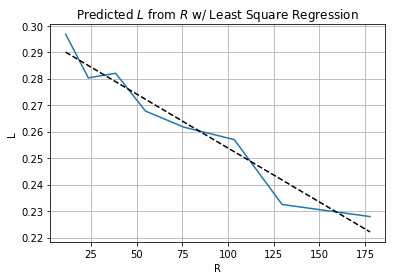

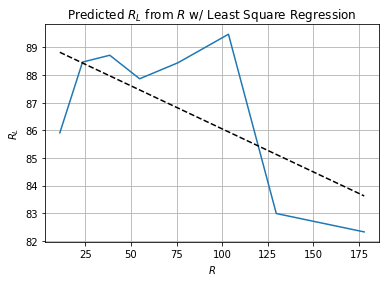

In [118]:
L = []
w = 50*2*pi
for i, el in enumerate(df_rl["|$V_L$|"]):
    vp = df_rl["|$V_{p , \ rms}$|"][i]
    ip = df_rl["|$I_p$| (Wattmeter)"][i]
    ang = df_rl["Angle of ${V_R}$"][i]*pi/180.0
    ans  = vp/(ip*w)*sin(-ang)
    L.append(ans)
    
R_L = []
for i, el in enumerate(df_rl["|$V_L$|"]):
    vp = df_rl["|$V_{p , \ rms}$|"][i]
    ip = df_rl["|$I_p$| (Wattmeter)"][i]
    ang = df_rl["Angle of ${V_R}$"][i]*pi/180.0
    ans  = vp/(ip)*cos(-ang)-df_rl["R (Wattmeter)"][i]
    R_L.append(ans)

# remove outliers
del R_L[0]
del L[0]
R = df_rl["R (Wattmeter)"][1:]

# Fit lines
import numpy as np
fit_R_L = np.polyfit(R,R_L,1)
fit_fn_R_L = np.poly1d(fit_R_L) 

fit_L = np.polyfit(R,L,1)
fit_fn_L = np.poly1d(fit_L) 

plt.figure(3)
plt.plot(R, L, R, fit_fn_L(R),'--k')
plt.grid()
plt.title('Predicted $L$ from $R$ w/ Least Square Regression')
# plt.axis([0, max(v_r_real), 0, max(v_r_real)])
plt.xlabel("R")
plt.ylabel("L")
plt.savefig('Predicted_L_from_R')
plt.show()

plt.figure(4)
plt.plot(R, R_L, R, fit_fn_R_L(R),'--k')
plt.grid()
plt.title('Predicted $R_L$ from $R$ w/ Least Square Regression')
# plt.axis([0, max(v_r_real), 0, max(v_r_real)])
plt.xlabel("$R$")
plt.ylabel("$R_L$")
plt.savefig('Predicted_RL_from_R')
plt.show()

### Taking the mean value of the points on the line

In [115]:
print("Least squares estimate of L: ")
L_val = np.mean(fit_fn_L(R))
print(str(L_val))
print()
print("Least squares estimate of R_L: ")
R_L_val = np.mean(fit_fn_R_L(R))
print(str(R_L_val))

Least squares estimate of L: 
0.2632520294263672

Least squares estimate of R_L: 
86.77462697199509


## Part 3: Single Phase RLC Circuit

In [128]:
import pandas as pd
df_rlc = pd.DataFrame({
    '$V_R$':                            [14.3,  28.3,  33.7,  44.8,  84.5,  102.5, 109.9, 114.6, 116.6, 119.2], 
    '$V_{p}$ (Wattmeter)':       [121.6, 121.9, 121.7, 121.0, 121.4, 121.0, 120.8, 121.0, 121.4, 121.4],
    '$V_{p}$ (Variac)':          [120.6, 121.3, 120.7, 120.3, 120.3, 120.1, 120.3, 120.7, 120.9, 120.7],
    '$I_p$ (Wattmeter)':                [0.96,  1.88,  1.11,  1.16,  1.35,  1.35,  1.34,  1.30,  1.28,  1.23 ],
    '$I_p$ (Variac)':                   [0.934, 1.024, 1.044, 1.103, 1.244, 1.226, 1.210, 1.160, 1.144, 1.096],
    '$I_R (Variac)$':                            [1.130, 1.103, 1.086, 1.046, 0.83,  0.63,  0.524, 0.429, 0.379, 0.293],
    'Measured $P$ (watts)':             [99,    115,   122,   132,   160,   155,   151,   143,   136,   130  ],
    'Measured $Q$ (VAR)':               [-64,   -60,   -58,   -55,   31,    47,    55,    67,    70,    78   ],
    'Measured $pf$':                    [0.850, 0.885, 0.897, 0.930, 0.987, 0.950, 0.937, 0.905, 0.872, 0.85 ],
    })

# Calculate the resistance at each data point
R = []
for i, el in enumerate(df_rlc["$V_R$"]):
    V = df_rlc["$V_R$"][i]
    I = df_rlc["$I_R (Variac)$"][i]
    R.append(V/I)
    
df_rlc["R"] = R

,$V_R$,$V_{p}$ (Wattmeter),$V_{p}$ (Variac),$I_p$ (Wattmeter),$I_p$ (Variac),$I_R (Variac)$,Measured $P$ (watts),Measured $Q$ (VAR),Measured $pf$,R
0,14.3,121.6,120.6,0.96,0.934,1.130,99,-64,0.850,12.655
1,28.3,121.9,121.3,1.88,1.024,1.103,115,-60,0.885,25.657
2,33.7,121.7,120.7,1.11,1.044,1.086,122,-58,0.897,31.031
3,44.8,121.0,120.3,1.16,1.103,1.046,132,-55,0.930,42.830
4,84.5,121.4,120.3,1.35,1.244,0.830,160,31,0.987,101.807
5,102.5,121.0,120.1,1.35,1.226,0.630,155,47,0.950,162.698
6,109.9,120.8,120.3,1.34,1.210,0.524,151,55,0.937,209.733
7,114.6,121.0,120.7,1.30,1.160,0.429,143,67,0.905,267.133
8,116.6,121.4,120.9,1.28,1.144,0.379,136,70,0.872,307.652
9,119.2,121.4,120.7,1.23,1.096,0.293,130,78,0.850,406.826


## Calculating the angle of $Ip$

$$
Z_{eq} = 
\big(  R + \frac{1}{sC}  \big) 
\mathbf{\big/\big/}
\big(   R_L + sL  \big)
$$

$$
Z_{eq} = \frac
{s^2 (R) + s (\frac{R R_L}{L} + \frac{1}{C}) + \frac{R_L}{LC}  }
{s^2 + s (\frac{R + R_L}{L}) + \frac{1}{LC}}
$$

$$
Z_{eq} = 
\frac
{(-\omega^{2})(R) + j \omega ( \frac{R R_L}{L} + \frac{1}{C}) + \frac{R_L}{LC} }
{-\omega^{2} + j \omega (\frac{R + R_L}{L}) + \frac{1}{LC} }
$$

Getting it into rectangular form:

$$
Z_{eq} = 
\frac
{ \big( \frac{R_L}{LC} - \omega^{2}R \big) + j \omega \big(  \frac{R R_L}{L} + \frac{1}{C} \big)    }
{ \big( \frac{1}{LC} - \omega^2 \big) + j\omega \big( \frac{R + R_L}{L} \big) }
$$


$\angle I_p$ can be calculated (with $V_p$ as reference) as: 

$$
I_p = \frac{V_p}{Z_{eq}}  \quad \Rightarrow \quad \angle I_p = \frac{\angle 0}{\angle Z_{eq}} = \angle(- Z_{eq})
$$

$$
\angle(- Z_{eq}) = \angle (I_p) = \tan^{-1} \bigg( \omega \big(\frac{R + R_L}{L}\big) \frac{1}{\frac{1}{LC} - \omega^2} \bigg)  \ - \  
\tan^{-1} \bigg(  \omega \big( \frac{R R_L}{L} + \frac{1}{C} \big) \frac{1}{\frac{R_L}{LC}-\omega^2 R}   \bigg)
$$

In [129]:
w= 50*2*pi
L_ = L_val
R_L_ = R_L_val

I_p_ang = []
for i, el in enumerate():
    